Import the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection & preprocessing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
# first  5 rows of dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the missing values
car_dataset.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [8]:
# encoding the "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
# encoding the "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
# encoding the "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)



In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and target

In [10]:
X = car_dataset.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [11]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [12]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Splitting the training and test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [14]:
print(X.shape,  X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training

Linear Regression

In [15]:
# Loading the linear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [17]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8799451660493711


Visualizing the actual prices and predicted prices

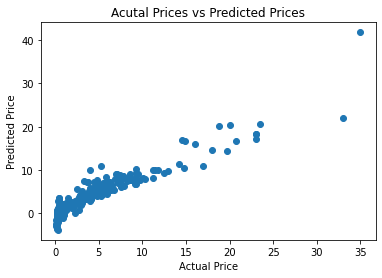

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Prices vs Predicted Prices')
plt.show()

In [20]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8365766715027051


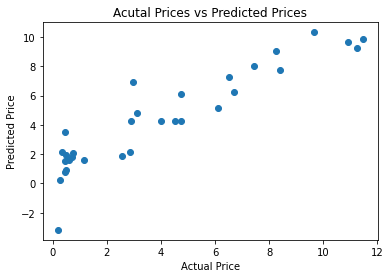

In [22]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Prices vs Predicted Prices')
plt.show()

2.Lasso Regression

In [23]:
# Loading the linear regression model
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model Evaluation

In [25]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [26]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8427856123435794


Visualizing the actual prices and predicted prices

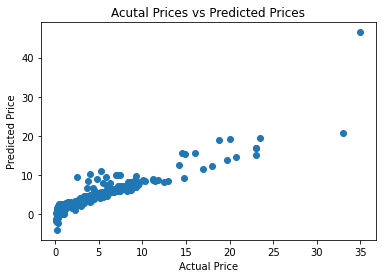

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Prices vs Predicted Prices')
plt.show()

In [28]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [29]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8709167941173195


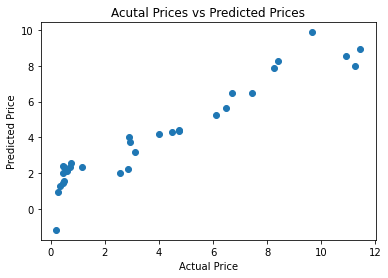

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Prices vs Predicted Prices')
plt.show()